<a href="https://colab.research.google.com/github/kolhesamiksha/Loan-prediction/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<font color='Voilet'> Bank Loan Data Analysis**

Before Diving into the data...we can hypothesize that

1.Higher the salary--> Higher chances of loan Approval.

2.Lesser the loan Amount-->Higher the chances of Loan Approval.

3.Less amount and less term --> Higher chances of loan Approval

4.Less EMI--> Higher chances of Loan Approval.

In [1]:
import pandas as pd 
import seaborn as sb

In [2]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
981*40/100

392.4

In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [13]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
#nominal_categories = ['Gender','Married','Self_Employed','Credit_History']


In [15]:
import matplotlib.pyplot as plt

In [16]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

**-<font color='Red'> Univariate Analysis**

**For Nominal Variables**

<function matplotlib.pyplot.show>

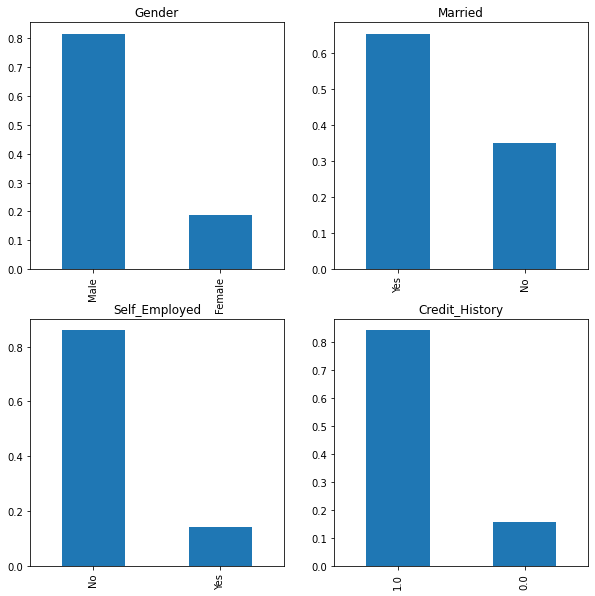

In [17]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Credit_History')
plt.show

**-<font color='Magenta'> It can Be inferred from the above data that:**

-<face color='Black'> 80% applicants are male

-<face color='Black'> 65% applicants are Married 

-<face color='Black'> 15%% applicants are self_employed

-<face color='Black'> 85% applicants have repaid their debts.   

**For Ordinal Variables**

In [18]:
#orinal_categories=['Dependence,'Education,'Property_Area']

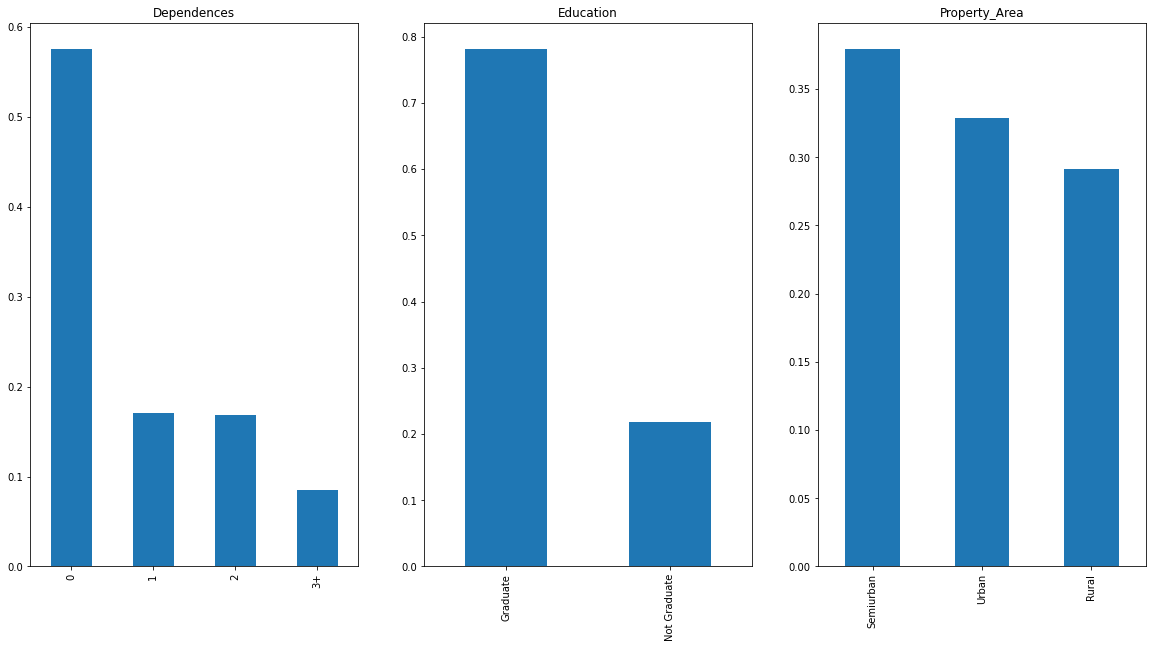

In [19]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependences')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Property_Area')
plt.show()

Most of the employees have no dependents

upto 78% of the total are graduates.

mostly are from semiurban area.

**Numerical Variables**

In [20]:
#numerical_variables=['ApplicantIncome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


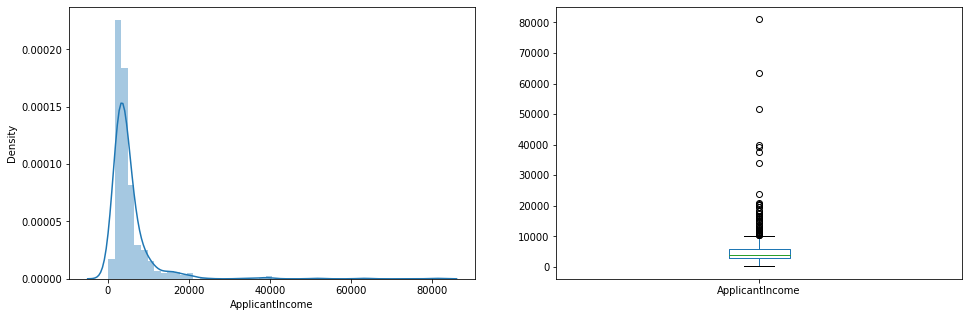

In [21]:
plt.subplot(121)
sb.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))


IT can Be inferred from distplot is applicationIncome is not normally distribted and for better model predictions we need to make it in normal distribution

from Boxplot we can inferred that the outliers reffered to the high income in the society. It's good to remove those outliers that doesn't contains any

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, ' ')

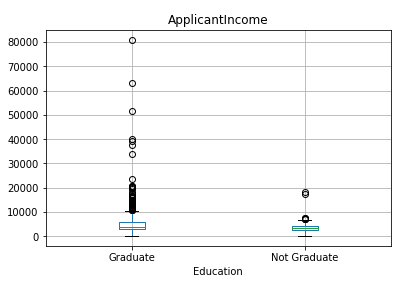

In [22]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")


It can be inferred from the above that,there are higher no of graduates having much income. appearing to be outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


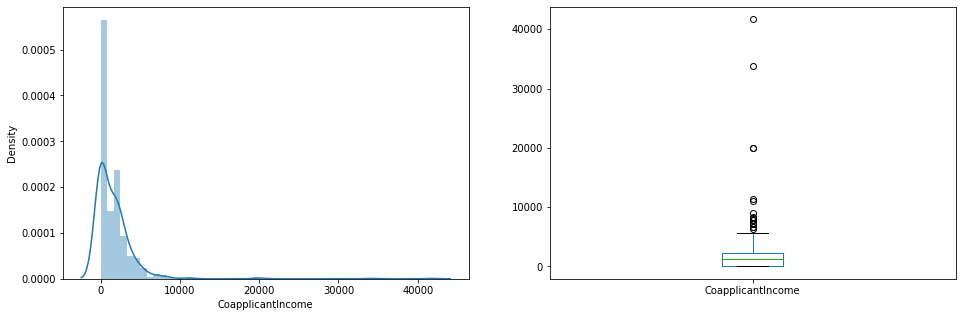

In [23]:
plt.subplot(121)
sb.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Let's look at the distribution of loan Amount Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


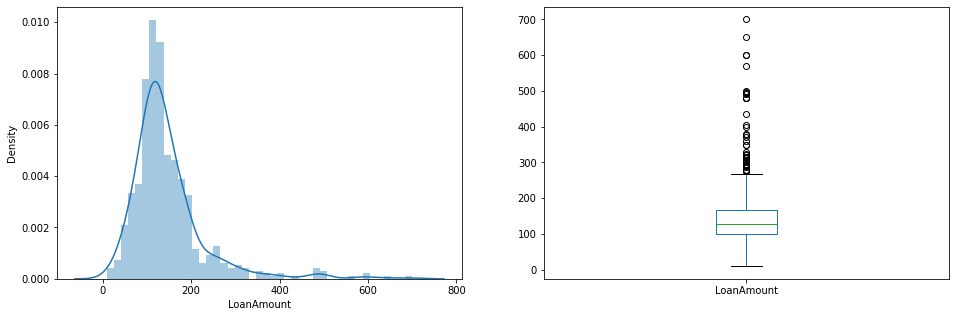

In [24]:
plt.subplot(121)
sb.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

We can see that there are more no of outliers and distribution is also fairly normal.

**-<font color='red' > Bivariate Analysis:**

It's the relation checking between Independent and Target Variable(i.s Loan_status and other Features.

Let's first check the relation between Nominal Variables and Loan_status

In [25]:
#nominal_categories = ['Gender','Married','Self_Employed','Credit_History']

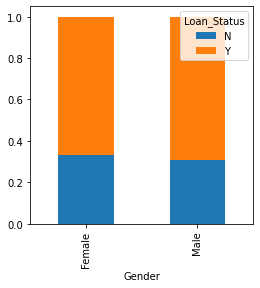

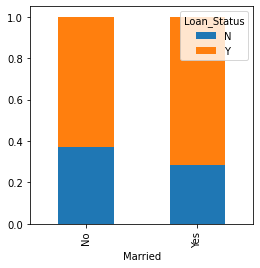

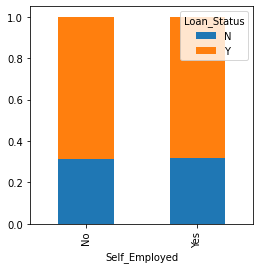

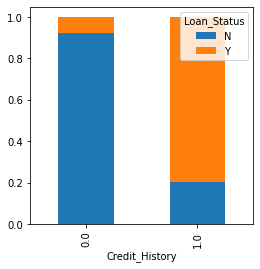

In [26]:

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

From Above Analysis----->
We can conclude that:

1.Married one's have more chances of loan approval than not_married one's.

2.Those who have repaid their previous loans got more reliability by bank and have more chances of loan_approval.

3.Not that much relation between loan approval of male--female & Self_Employed.

In [27]:
#orinal_categories=['Dependence,'Education,'Property_Area']

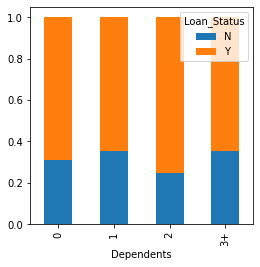

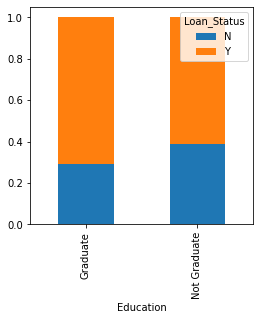

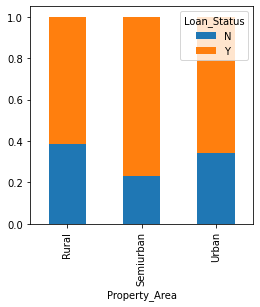

In [28]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Conclusion From above would be:
1. Applicant with 2 dependents got more chances of loan Approval.
2. Graduate Applicants Has more chances of loan Approval.
3. Semiurban Applicants has more chances of loan_Approval.

Numerical Variables:

In [29]:
#numerical_variables=['ApplicantIncome']

For Numerical Analysis,We need to find the mean of variable with loan_status----------->Groupby is more preferred

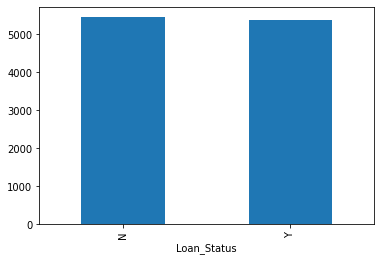

In [30]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

It's opaque to find the difference as per the income...but there should be some sort of variability in the loan_status as per the income(low,avg,high,much high). 

So,We'll sort as per the income in the society and infere then...

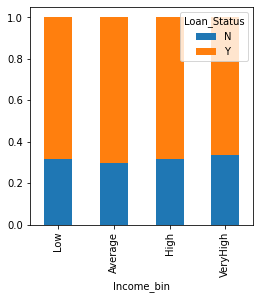

In [31]:
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','VeryHigh']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


From the above we can say that: There is not much effect of changing income onto the loan Approval:)
But-----we hypothesized that higher the income higher will be loan_approval chances

Let's Check Is it same for co-applicant income also

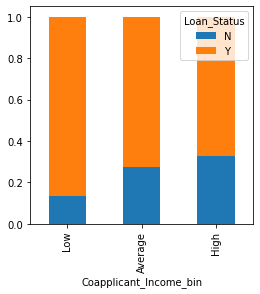

In [32]:
bins=[0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Above Plot convey's us that: with coapplicant having less income got more chances of loan_Approval.

-----------------------How it could possible-----------------------

What if we make the total of both's Income and then check:

Let's Do that:

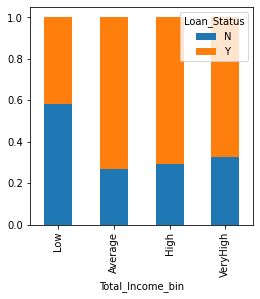

In [33]:
train['Total_Income']= train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','VeryHigh']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Now its making sense---->our hypothesis was Correct:) that higher income one's have higher chance of loan_approval

Now check whether our assumption is correct in case of loan Amount i.e lesser the loan amount greater will be the chance of loan_Approval

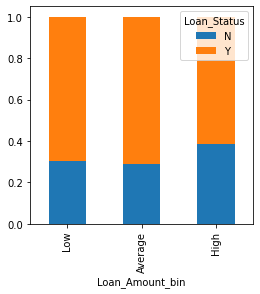

In [34]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Lesser the Loan Amount Higher the chances of Loan Approval

Now drop the bin columns that we've created-------and also for model building drop the unnecessary values like 3+ to 3 & Y ,N to 1,0 etc

In [35]:
train.drop(['Income_bin','Coapplicant_Income_bin','Loan_Amount_bin','Total_Income_bin','Total_Income'],axis=1,inplace=True)

In [36]:
train.shape

(614, 13)

In [37]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

Let's find the best features through correlation..i.e 

More the +ve correlation more best fit it is.

More the -ve correlation more the best fit it is.

In [38]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


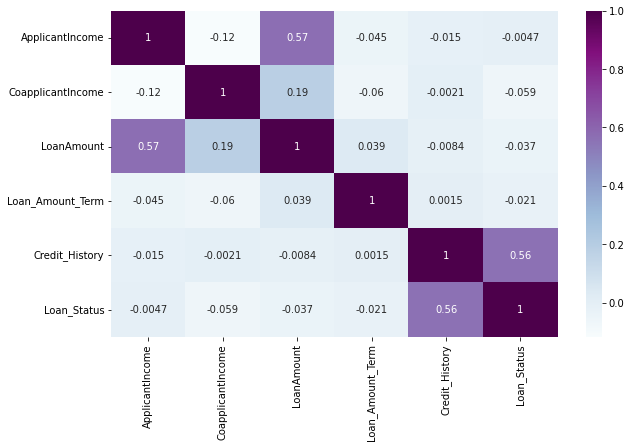

In [39]:
corr = train.corr()
f,ax=plt.subplots(figsize=(10,6))
sb.heatmap(corr,annot=True,cmap='BuPu')

**-<font color='Red'> Missing Value treatment and Outlier Removal**

In [40]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We'll Fill The categorical Values by Most Frequent Values i.e Mode()

and Loan_Amount_Term doesn't have that much variation in values-->just 4-5 values. so,its good to fill with mode()

In [41]:
train['Gender'].mode()
train['Dependents'].mode()
train['Education'].mode()
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
train['Gender'].fillna(train['Gender'].mode()[0],axis=0,inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],axis=0,inplace=True)
train['Married'].fillna(train['Married'].mode()[0],axis=0,inplace=True)
train['Education'].fillna(train['Education'].mode()[0],axis=0,inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],axis=0,inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],axis=0,inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],axis=0,inplace=True)

Loan Amount has more no of outliers...instead of mean better to use middle value i.e median()

In [43]:
train['LoanAmount'].median()

128.0

In [44]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),axis=0,inplace=True)

In [45]:
test['Gender'].fillna(test['Gender'].mode()[0],axis=0,inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],axis=0,inplace=True)
test['Married'].fillna(test['Married'].mode()[0],axis=0,inplace=True)
test['Education'].fillna(test['Education'].mode()[0],axis=0,inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],axis=0,inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],axis=0,inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],axis=0,inplace=True)

In [46]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),axis=0,inplace=True)

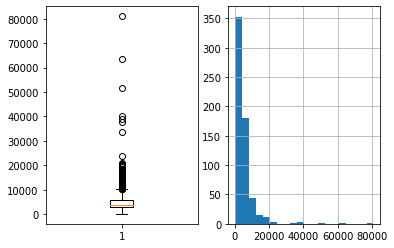

In [47]:
plt.subplot(121)
plt.boxplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].hist(bins=20)

In [48]:
X = pd.get_dummies(train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Second principle component')

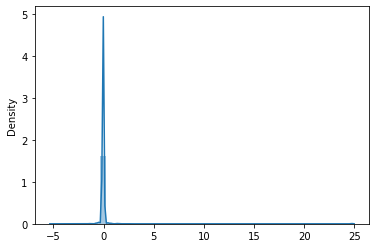

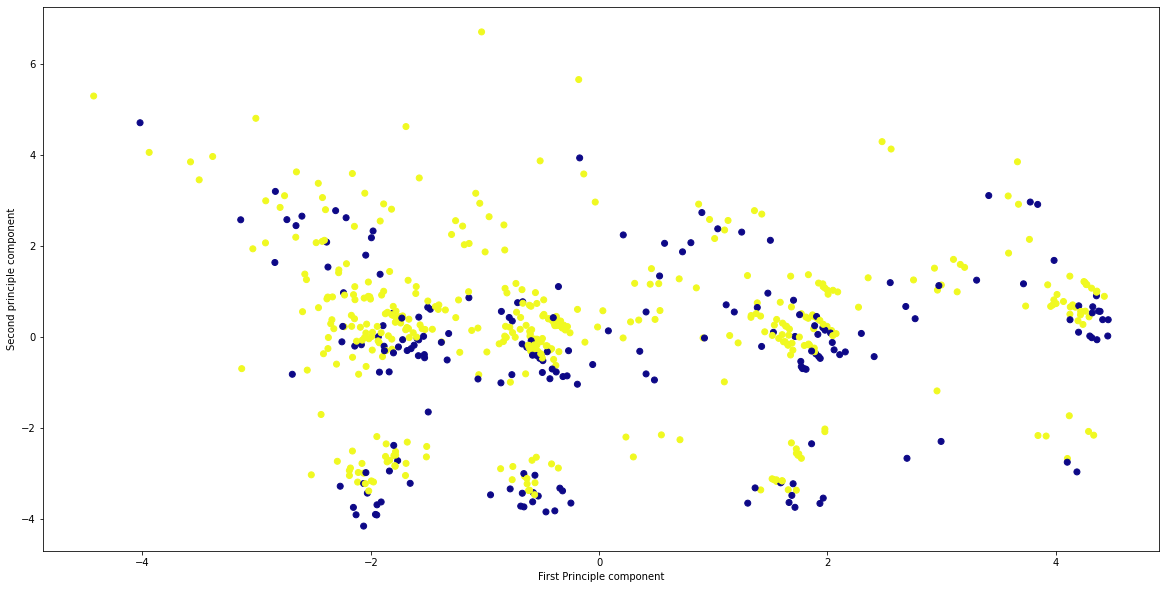

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X)
scaler_data = scaler.transform(X)
sb.distplot(scaler_data)
pca = PCA(n_components=2)
pca.fit(scaler_data)
pca_d = pca.transform(scaler_data)
plt.figure(figsize=(20,10))
plt.scatter(pca_d[:,0],pca_d[:,1],c=train['Loan_Status'],cmap='plasma')
plt.xlabel("First Principle component")
plt.ylabel("Second principle component")



{'boxes': [<matplotlib.lines.Line2D at 0x7feae4b6d990>],
 'caps': [<matplotlib.lines.Line2D at 0x7feae4b72990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feae4b789d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feae4b78490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feae4b6ded0>,
  <matplotlib.lines.Line2D at 0x7feae4b72450>]}

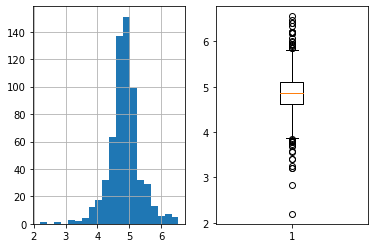

In [50]:
import numpy as np
train['ApplicantIncome_Log'] = np.log(train['LoanAmount'])
plt.subplot(121)
train['ApplicantIncome_Log'].hist(bins=20)
plt.subplot(122)
plt.boxplot(train['ApplicantIncome_Log'])

Through Log Transformation Right skewed distribution will get converted into Normal Distribution which is mendatory for good predictions

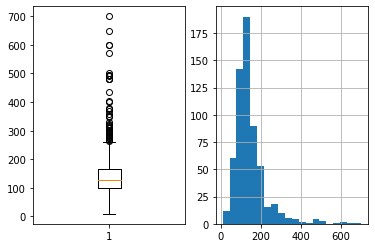

In [51]:
plt.subplot(121)
plt.boxplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].hist(bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7feae4913590>],
 'caps': [<matplotlib.lines.Line2D at 0x7feae491b590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feae49205d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feae4920090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feae4913ad0>,
  <matplotlib.lines.Line2D at 0x7feae491b050>]}

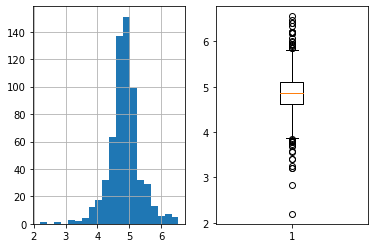

In [52]:
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
plt.subplot(121)
train['LoanAmount_Log'].hist(bins=20)
plt.subplot(122)
plt.boxplot(train['LoanAmount_Log'])

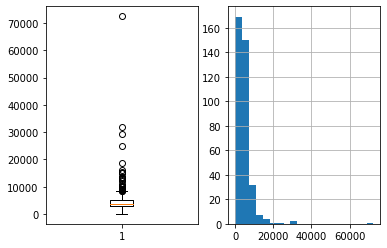

In [53]:
plt.subplot(121)
plt.boxplot(test['ApplicantIncome'])
plt.subplot(122)
test['ApplicantIncome'].hist(bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7feae4734f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7feae473cf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feae4744fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feae4744a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feae473c510>,
  <matplotlib.lines.Line2D at 0x7feae473ca50>]}

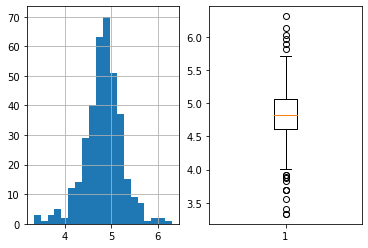

In [54]:
test['ApplicantIncome_Log'] = np.log(test['LoanAmount'])
plt.subplot(121)
test['ApplicantIncome_Log'].hist(bins=20)
plt.subplot(122)
plt.boxplot(test['ApplicantIncome_Log'])

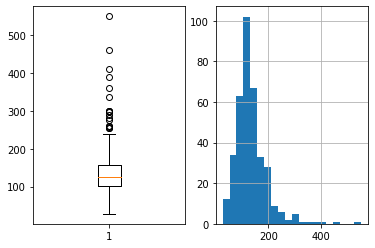

In [55]:
plt.subplot(121)
plt.boxplot(test['LoanAmount'])
plt.subplot(122)
test['LoanAmount'].hist(bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7feae452df50>],
 'caps': [<matplotlib.lines.Line2D at 0x7feae4535f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feae453df90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feae453da50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feae45354d0>,
  <matplotlib.lines.Line2D at 0x7feae4535a10>]}

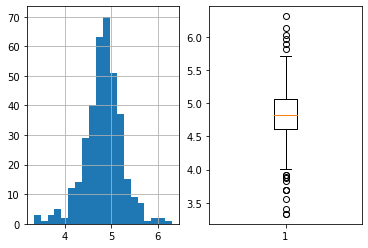

In [56]:
test['LoanAmount_Log'] = np.log(test['LoanAmount'])
plt.subplot(121)
test['LoanAmount_Log'].hist(bins=20)
plt.subplot(122)
plt.boxplot(test['LoanAmount_Log'])

Uptil Now We did Exploratory data analysis and normal distribution of data

It's Time for**-<font color='Red'> Model Building**

Dropping unnecessary column,which makes not certain difference for learning of our model

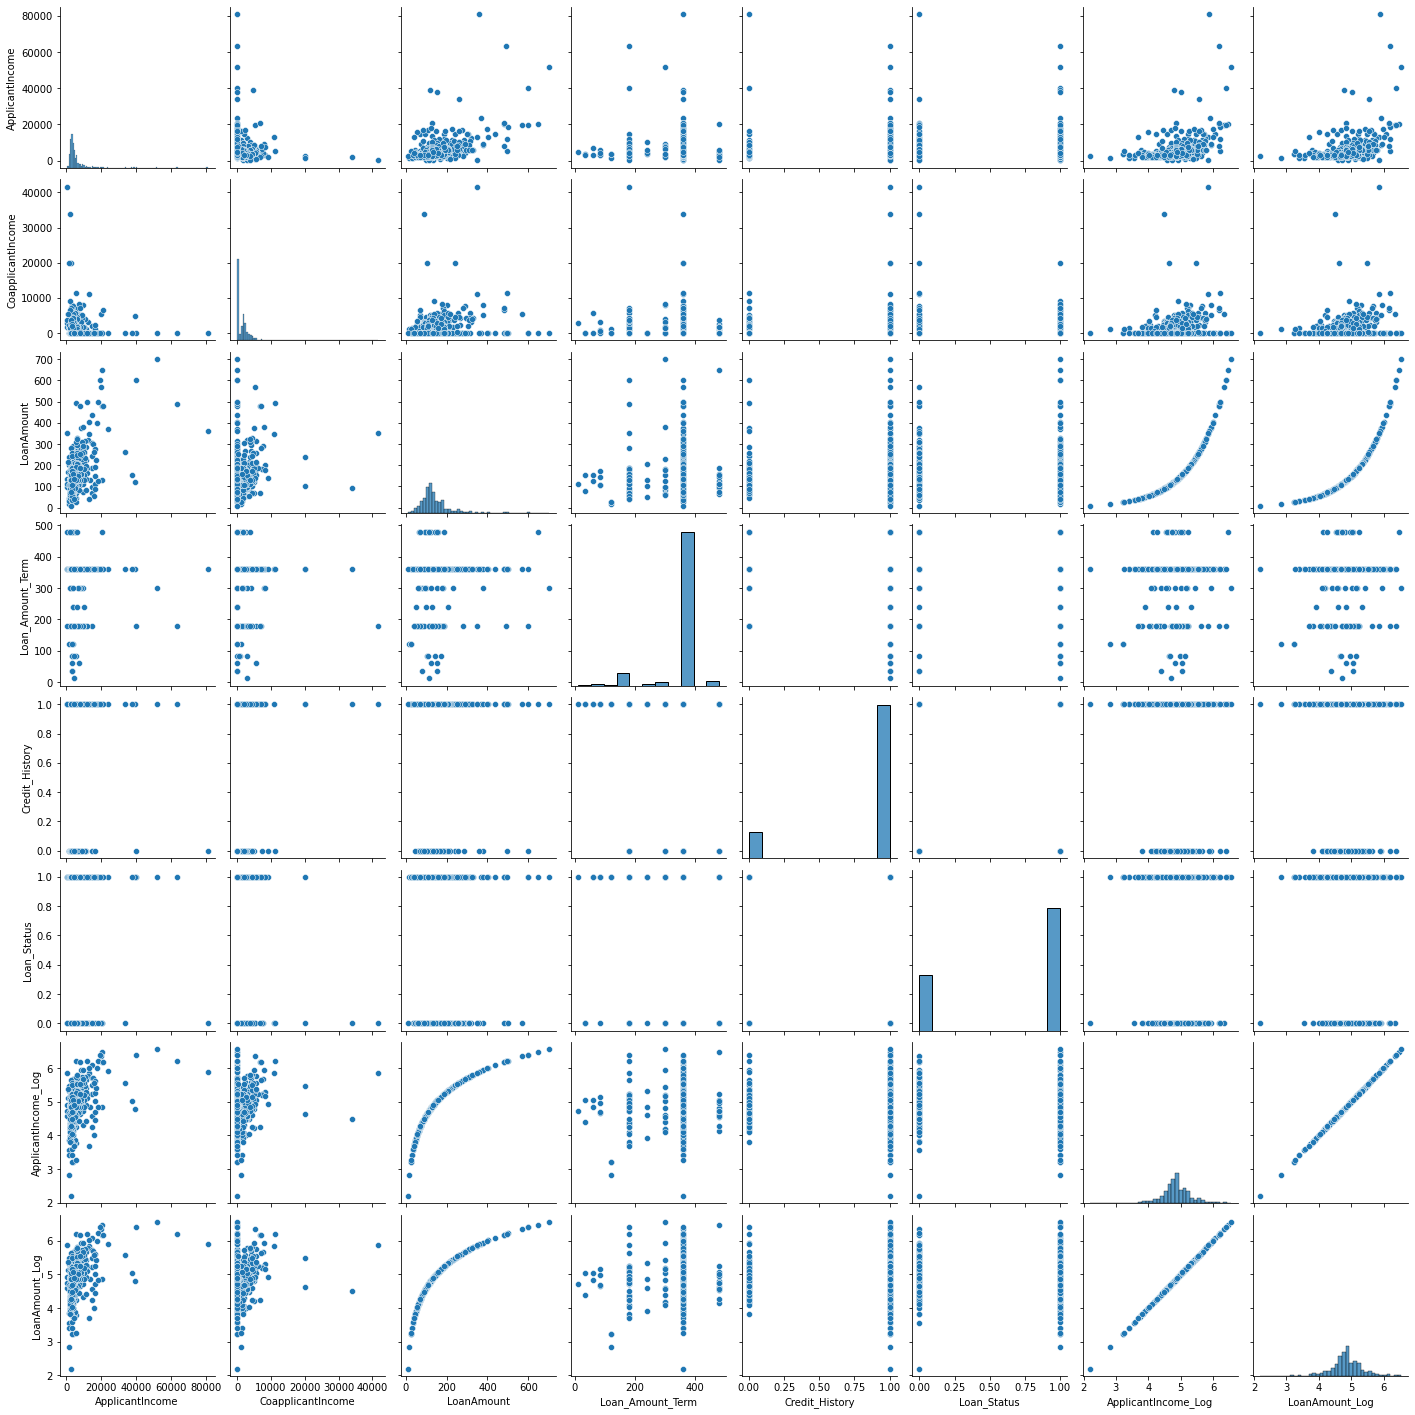

In [57]:
sb.pairplot(train)

From the above pairplot it would be better to have a horizontal_best fit line

In [58]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   ApplicantIncome      614 non-null    int64  
 6   CoapplicantIncome    614 non-null    float64
 7   LoanAmount           614 non-null    float64
 8   Loan_Amount_Term     614 non-null    float64
 9   Credit_History       614 non-null    float64
 10  Property_Area        614 non-null    object 
 11  Loan_Status          614 non-null    int64  
 12  ApplicantIncome_Log  614 non-null    float64
 13  LoanAmount_Log       614 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 67.3+ KB


Now, It's Time For one of encoding for categorical columns

In [60]:
# After feature selection Cinvert our data into dependent Y and independent features X
independent_vars = train.drop('Loan_Status',axis=1)
dependent_var= train['Loan_Status']

In [61]:
independent_vars= pd.get_dummies(independent_vars)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [62]:
independent_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   ApplicantIncome_Log      614 non-null    float64
 6   LoanAmount_Log           614 non-null    float64
 7   Gender_Female            614 non-null    uint8  
 8   Gender_Male              614 non-null    uint8  
 9   Married_No               614 non-null    uint8  
 10  Married_Yes              614 non-null    uint8  
 11  Dependents_3             614 non-null    uint8  
 12  Dependents_0             614 non-null    uint8  
 13  Dependents_1             614 non-null    uint8  
 14  Dependents_2             6

In [63]:
independent_vars.shape

(614, 22)

In [64]:
dependent_var.shape

(614,)

In [65]:
614*70/100

429.8

In [66]:
#from sklearn.preprocessing import StandardScaler

In [67]:
#scaler = StandardScaler()
#scaler.fit(train)
#scaler_data = scaler.transform(train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


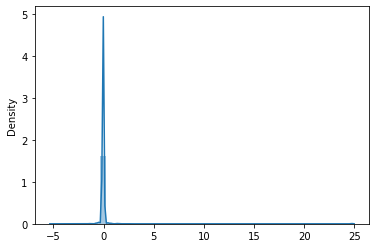

In [68]:
sb.distplot(scaler_data)

In [69]:
#from sklearn.decomposition import PCA

In [70]:
#pca = PCA(n_components=2)
#pca.fit(train)
#pca_d = pca.transform(train)

In [71]:
#plt.figure(figsize=(20,10))
#plt.scatter(pca_d[:,0],pca_d[:,1],c=train['Loan_Status'],cmap='plasma')
#plt.xlabel("First Principle component")
#plt.ylabel("Second principle component")


In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(independent_vars,dependent_var,test_size= 0.3,random_state=1)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 22)
(185, 22)
(429,)
(185,)


### Logistic Regression(Binary Regression) Model Builting

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_model = LogisticRegression()

In [76]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 81 to 37
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          429 non-null    int64  
 1   CoapplicantIncome        429 non-null    float64
 2   LoanAmount               429 non-null    float64
 3   Loan_Amount_Term         429 non-null    float64
 4   Credit_History           429 non-null    float64
 5   ApplicantIncome_Log      429 non-null    float64
 6   LoanAmount_Log           429 non-null    float64
 7   Gender_Female            429 non-null    uint8  
 8   Gender_Male              429 non-null    uint8  
 9   Married_No               429 non-null    uint8  
 10  Married_Yes              429 non-null    uint8  
 11  Dependents_3             429 non-null    uint8  
 12  Dependents_0             429 non-null    uint8  
 13  Dependents_1             429 non-null    uint8  
 14  Dependents_2             4

In [77]:
log_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Log,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,4.700480,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,4.836282,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,5.337538,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,4.605170,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,4.356709,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [79]:
pred_vald_actual_test = log_model.predict(test) 
pred_vald_actual_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [80]:
pred_vald_test = log_model.predict(x_test)
pred_vald_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [81]:
pred_vald_train = log_model.predict(x_train)
pred_vald_train

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [82]:
from sklearn.metrics import accuracy_score
testing_matrics = accuracy_score(y_test,pred_vald_test)
training_matrics = accuracy_score(y_train,pred_vald_train)

In [83]:
testing_matrics

0.7945945945945946

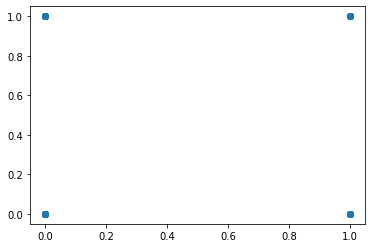

In [84]:
plt.scatter(y_train,pred_vald_train)

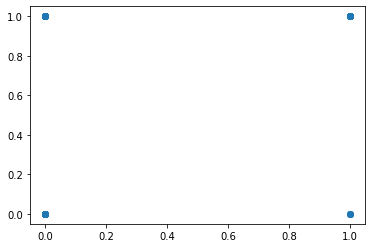

In [85]:
plt.scatter(y_test,pred_vald_test)

In [86]:
print(training_matrics)
print(testing_matrics)


0.8135198135198135
0.7945945945945946


From above matrics...model seems to be best..not overfit and underfit

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
poly_model = PolynomialFeatures()

In [89]:
poly_train = poly_model.fit_transform(x_train)


In [90]:
poly_test = poly_model.fit(x_test)

In [91]:
log_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
log_model.fit(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
poly_pred_train = log_model.predict(x_train)
poly_pred_train

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [94]:
poly_pred_test = log_model.predict(x_test)
poly_pred_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1])

In [95]:
from sklearn.metrics import accuracy_score
testing_matrics1 = accuracy_score(y_test,poly_pred_test)
training_matrics1 = accuracy_score(y_train,poly_pred_train)

In [96]:
testing_matrics1

0.772972972972973

In [97]:
training_matrics1

0.7762237762237763

By using Logistic Regression training_accuracy got to be 78% and testing_accuracy = 79%

By using Polynomial Logistic regression training_accuracy got to be80%
and testing_accuracy = 79%

Let's Check How Our Model Will perform on <font color='Red' > **Unseen Data**

By using **<font color='red'> Stratified k-fold Cross-Validation** <font color='Black' >: best for bias and variance && our data is balanced so..no worries regarding this validation aproach

In [98]:
from sklearn.model_selection import StratifiedKFold
i=1
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(independent_vars,dependent_var):
  print(f'{i} of Kfold {skf.n_splits}')
  x_train1,x_test1 = independent_vars.iloc[train_index],independent_vars.iloc[test_index]
  y_train1,y_test1 = dependent_var.iloc[train_index],dependent_var.iloc[test_index]
  skf_model = LogisticRegression(random_state=1)
  skf_model.fit(x_train1,y_train1)
  pred_skf_test = skf_model.predict(x_test1)
  test_skf_score = accuracy_score(y_test1,pred_skf_test)
  print("accuracy score is",test_skf_score)
  i = i+1
  pred_skf_actual_test = skf_model.predict(test)
  pred = skf_model.predict_proba(x_test1)[:,1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1 of Kfold 5
accuracy score is 0.7967479674796748
2 of Kfold 5
accuracy score is 0.8130081300813008
3 of Kfold 5
accuracy score is 0.7804878048780488
4 of Kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy score is 0.7723577235772358
5 of Kfold 5
accuracy score is 0.7950819672131147


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Mean Validation Accuracy Turns Out to be (0.79%)

In [99]:
x = (0.7967479674796748+0.8130081300813008+ 0.7804878048780488+0.7723577235772358+0.7868852459016393)/5
x

0.78989737438358

Now let's check how our model performed for unseen data by AUC-ROC cuve

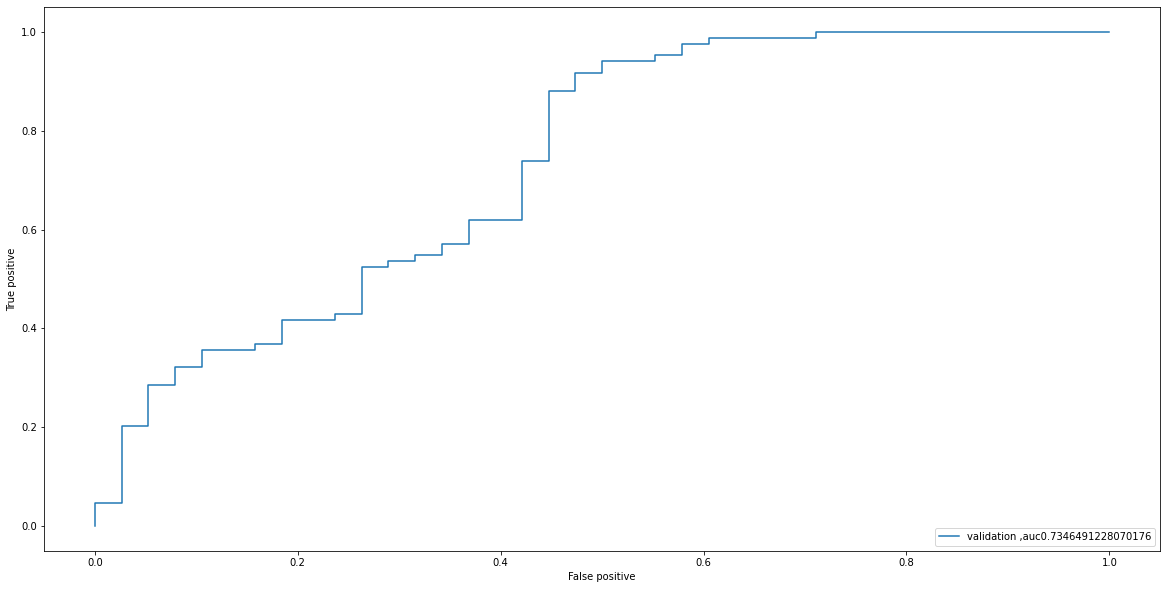

In [100]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test1,pred)
auc = metrics.roc_auc_score(y_test1,pred)
plt.figure(figsize = (20,10))
plt.plot(fpr,tpr,label = "validation ,auc"+str(auc))
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc=4)
plt.show()

We got an AUC value 0.73 i.e. 73% predictions are predicted true 1-1's and 0-0's Moreover loan approved and not approved by model

Again to improve our model Accuracy more and more let's Apply **<font color='Red'> Feature Engineering** <font color='black'>and analyse how the performance differ

In feature Engineering,basically we add or remove some features that affect our target variable.

Before proceeding with our model we made some assumtions:

<font color = 'Red' > 1. Total Income: <font color = 'black'> It had made sense to loan approval in the before analysis

<font color = 'Red'> 2. EMI:  <font color = 'black'> the person having more EMI find it difficult to pay that. so, it'd be better to create this feature and see the changes in accuracy.

<font color = 'Red'> 3. Balance Income: <font color = 'Black'> If Income is high and income left after cutting EMI is more then chances of repay the loan would be more.

In [101]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [102]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


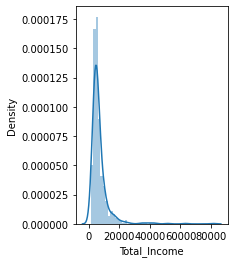

In [103]:
plt.subplot(121)

sb.distplot(train['Total_Income'])

Aplying log transformation to fit it into gaussian distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


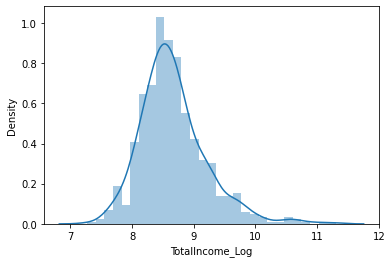

In [104]:
train['TotalIncome_Log'] = np.log(train['Total_Income'])
sb.distplot(train['TotalIncome_Log'])
test['TotalIncome_Log'] = np.log(train['Total_Income'])

Yehhh! It's Normally distributed now and ready for training

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


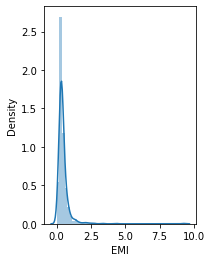

In [105]:
plt.subplot(122)
sb.distplot(train['EMI'])

In [106]:
train['balanceIncome'] = train['Total_Income']-(train['EMI']*1000)
test['balanceIncome'] = test['Total_Income']-(test['EMI']*1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


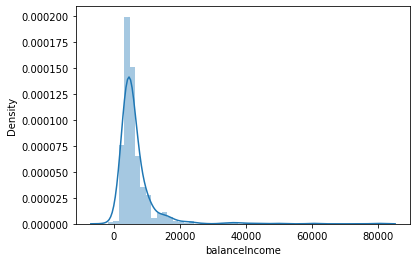

In [107]:
sb.distplot(train['balanceIncome'])

In [108]:
train['balanceIncome'].describe()

count      614.000000
mean      6551.017998
std       6290.136695
min      -1768.000000
25%       3804.305556
50%       4979.888889
75%       6958.027778
max      80000.000000
Name: balanceIncome, dtype: float64

In [109]:
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


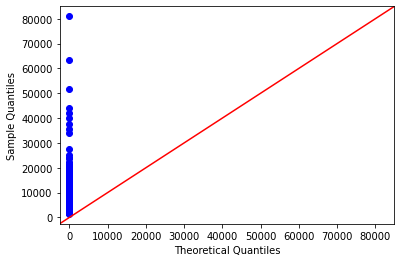

In [110]:
sm.qqplot(train['Total_Income'],line='45')
plt.show()

In [111]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI,TotalIncome_Log,balanceIncome
0,5849,0.0,128.0,360.0,1.0,1,4.852030,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,0.355556,8.674026,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,0.355556,8.714568,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,0.183333,8.006368,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,0.333333,8.505323,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,0.391667,8.699515,5608.333333


In [112]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1)

Now we have changed our features and drop the unusable features for feature engieering to not cause any multicollinearity further

After Feature Engineering,let's apply Logistic regression and see what the accuracy will be

In [113]:
train.head()

,Credit_History,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,EMI,TotalIncome_Log,balanceIncome
0,1.0,1,4.852030,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.355556,8.674026,5493.444444
1,1.0,0,4.852030,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.355556,8.714568,5735.444444
2,1.0,1,4.189655,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0.183333,8.006368,2816.666667
3,1.0,1,4.787492,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0.333333,8.505323,4607.666667
4,1.0,1,4.948760,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.391667,8.699515,5608.333333


In [114]:
X = train.drop('Loan_Status',axis=1)
Y = train['Loan_Status']

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   Loan_Status              614 non-null    int64  
 2   ApplicantIncome_Log      614 non-null    float64
 3   LoanAmount_Log           614 non-null    float64
 4   Gender_Female            614 non-null    uint8  
 5   Gender_Male              614 non-null    uint8  
 6   Married_No               614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Dependents_3             614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Education_Graduate       614 non-null    uint8  
 13  Education_Not Graduate   614 non-null    uint8  
 14  Self_Employed_No         6

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           367 non-null    float64
 1   ApplicantIncome_Log      367 non-null    float64
 2   LoanAmount_Log           367 non-null    float64
 3   Gender_Female            367 non-null    uint8  
 4   Gender_Male              367 non-null    uint8  
 5   Married_No               367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_3             367 non-null    uint8  
 8   Dependents_0             367 non-null    uint8  
 9   Dependents_1             367 non-null    uint8  
 10  Dependents_2             367 non-null    uint8  
 11  Education_Graduate       367 non-null    uint8  
 12  Education_Not Graduate   367 non-null    uint8  
 13  Self_Employed_No         367 non-null    uint8  
 14  Self_Employed_Yes        3

In [117]:
i = 1
skf1 = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf1.split(X,Y):
  print(f'{i} of K5 fold {skf1.n_splits}')
  x_train2,x_test2 = X.iloc[train_index],X.iloc[test_index]
  y_train2,y_test2 = Y.iloc[train_index],Y.iloc[test_index]
  skf_model2 = LogisticRegression(random_state=1)
  skf_model2.fit(x_train2,y_train2)
  pred_tr = skf_model2.predict(x_train2)
  score_tr = accuracy_score(y_train2,pred_tr)
  pred_te = skf_model2.predict(x_test2)
  score_te = accuracy_score(y_test2,pred_te)
  print("Training_matrix",score_tr)
  print("Testing_matrix",score_te)
  i = i+1
  test_pred = skf_model2.predict(test)
  test_score = skf_model2.predict_proba(x_test2)[:,1]

1 of K5 fold 5
Training_matrix 0.8105906313645621
Testing_matrix 0.8130081300813008
2 of K5 fold 5
Training_matrix 0.8004073319755601
Testing_matrix 0.8373983739837398
3 of K5 fold 5
Training_matrix 0.814663951120163
Testing_matrix 0.7804878048780488
4 of K5 fold 5
Training_matrix 0.6883910386965377
Testing_matrix 0.6829268292682927
5 of K5 fold 5
Training_matrix 0.7723577235772358
Testing_matrix 0.7377049180327869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [118]:
mean_testing = (0.8130081300813008+0.8373983739837398+0.7804878048780488+0.6829268292682927+0.7377049180327869)/5
mean_testing

0.7703052112488338

ohh! Startified KFold work better for imbalance dataset too...

In [119]:
from sklearn.model_selection import train_test_split
x_trains,x_tests,y_trains,y_tests = train_test_split(X,Y,random_state=1,test_size=0.2)

In [120]:
print(x_trains.shape)
print(y_trains.shape)
print(x_tests.shape)
print(y_tests.shape)

(491, 21)
(491,)
(123, 21)
(123,)


In [121]:
def validation_set():
  logs_model = LogisticRegression()
  logs_model.fit(x_trains,y_trains)
  logs_pred_tr = logs_model.predict(x_trains)
  logs_score_tr = accuracy_score(y_trains,logs_pred_tr)
  logs_pred_te = logs_model.predict(x_tests)
  logs_score_te = accuracy_score(y_tests,logs_pred_te)
  print('Training matrix:',logs_score_tr)
  print('Testing matrix:',logs_score_te)


In [122]:
validation_set()

Training matrix: 0.8085539714867617
Testing matrix: 0.8048780487804879


Stratified Was better than Validation Set Aproach...

Before feature engineering our model had performed better 

Now we'll try out different models to get satisfied accuracy after feature engineering firstly by **<font color = 'Red'>  Decision Tree**

In [123]:
from sklearn import tree


In [124]:
skf_tree = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [125]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [126]:
sum = 0
l = []
def decision_tree(a,b):
  i=1
  for train_index,test_index in skf_tree.split(X,Y):
    print(f'{i} of KFold {skf_tree.n_splits}')
    x_train3,x_test3 = X.iloc[train_index],X.iloc[test_index]
    y_train3,y_test3  =Y.iloc[train_index],Y.iloc[test_index]
    tree_model = tree.DecisionTreeClassifier(random_state=1,max_depth=6)
    tree_model.fit(x_train3,y_train3)
    pred_tree = tree_model.predict(x_test3)
    score = accuracy_score(y_test3,pred_tree)
    print("Accuracy Score",score)
    l.append(score)
    i = i+1
  print("Depth of the decision tree",tree_model.get_depth)
  prediction_matrix = confusion_matrix(y_test3,pred_tree)
  return prediction_matrix


In [127]:
decision_tree(X,Y)

1 of KFold 5
Accuracy Score 0.7723577235772358
2 of KFold 5
Accuracy Score 0.8130081300813008
3 of KFold 5
Accuracy Score 0.8048780487804879
4 of KFold 5
Accuracy Score 0.8048780487804879
5 of KFold 5
Accuracy Score 0.7622950819672131
Depth of the decision tree <bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')>


array([[15, 23],
       [ 6, 78]])

In [128]:
mean_tree = (0.7723577235772358+0.8130081300813008+0.8048780487804879+0.8048780487804879+0.7622950819672131 )/5

In [129]:
mean_tree

0.7914834066373451



We need to built another let's try with multiple decision tress i.e.**<font color='Red'> RandomForest**

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
skf_rdf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [132]:
A = train.drop('Loan_Status',axis=1)

In [133]:
B = train['Loan_Status']

In [134]:
B.shape

(614,)

In [135]:
#def random_forest():
i=1
l = []
skf_rdf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_index,test_index in skf_rdf.split(A,B):
  print(f'{i} of KFold {skf_rdf.n_splits}')
  x_train4,x_test4 =  A.loc[train_index],A.loc[test_index]
  y_train4,y_test4 = B[train_index],B[test_index]
  rdf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=1)
  #print("n_sestimators",rdf.n_estimators)
  rdf.fit(x_train4,y_train4)
  #rdf_pred_tr = rdf_model.predict(x_train4)
  #print("Trainig Accuracy",accuracy_score(x_train4,rdf_pred_tr))
  rdf_pred_te = rdf.predict(x_test4)
  rdf_score = accuracy_score(y_test4,rdf_pred_te)
  print('Accuracy score',rdf_score)
  l.append(rdf_score)
  i = i+1


1 of KFold 5
Accuracy score 0.8130081300813008
2 of KFold 5
Accuracy score 0.8292682926829268
3 of KFold 5
Accuracy score 0.7886178861788617
4 of KFold 5
Accuracy score 0.7967479674796748
5 of KFold 5
Accuracy score 0.7704918032786885


In [136]:
#random_forest()

In [137]:
mean= (0.8211382113821138+0.8130081300813008+0.8130081300813008+0.7804878048780488+0.7786885245901639)/5

In [138]:
mean

0.8012661602025857

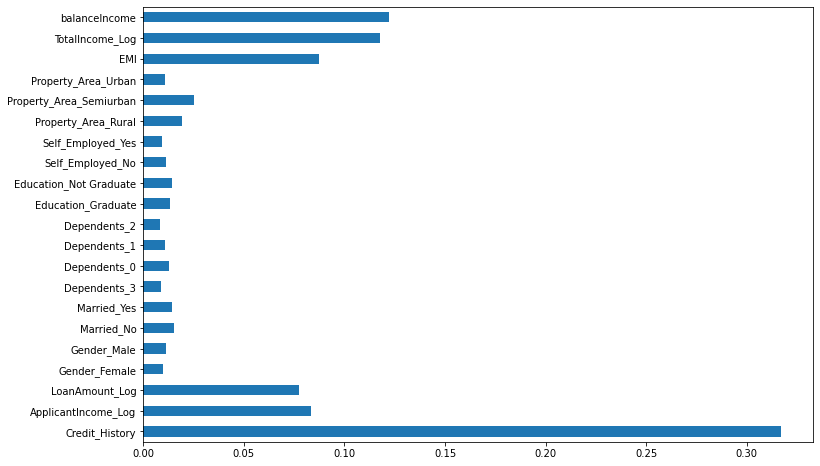

In [139]:
importance = pd.Series(rdf.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(12,8))

Feature Engineering Had really helped us coz, from above new created plot we can infere that new features were most important onces in model predictions

In [140]:
train.head()

,Credit_History,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,EMI,TotalIncome_Log,balanceIncome
0,1.0,1,4.852030,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.355556,8.674026,5493.444444
1,1.0,0,4.852030,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.355556,8.714568,5735.444444
2,1.0,1,4.189655,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0.183333,8.006368,2816.666667
3,1.0,1,4.787492,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0.333333,8.505323,4607.666667
4,1.0,1,4.948760,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.391667,8.699515,5608.333333


In [141]:
from sklearn.svm import SVC


In [142]:
svc = SVC(kernel='sigmoid')

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(A,B,random_state=1)

In [145]:
svc.fit(x_train5,y_train5)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [146]:
pred = svc.predict(x_test5)

In [147]:
pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [148]:
accuracy_score(y_test5,pred)

0.6103896103896104

In [149]:
matrix = confusion_matrix(y_test5,pred)

In [150]:
matrix

array([[10, 39],
       [21, 84]])

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
kn = KNeighborsClassifier()

In [154]:
kn.fit(x_train5,y_train5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
kn_pred = kn.predict(x_test5)

In [156]:
kn_score = accuracy_score(y_test5,kn_pred)

In [ ]:
kn_score

In [158]:
from sklearn.naive_bayes import GaussianNB

In [159]:
nb = GaussianNB()

In [160]:
nb.fit(x_train5,y_train5)

GaussianNB(priors=None, var_smoothing=1e-09)

In [161]:
nb_pred = nb.predict(x_test5)

In [163]:
nb_score = accuracy_score(y_test5,nb_pred)

In [ ]:
nb_score

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [166]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(x_train5,y_train5)

In [168]:
lda_pred = lda.predict(x_test5)

In [169]:
lda_score = accuracy_score(y_test5,lda_pred)

In [ ]:
lda_score